Была импортирована база данных согласно варианту 4

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('4heart2.csv');
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Проводится первичная обработка данных. Проверяются столбцы, типы и правильность информации. Обработка данных необходима, чтобы избежать ошибок, связанных с некорректными значениями или несоответствием типов данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Так как возраст использовается в виде целых значений, было решено поменять его тип данных с float на int

In [6]:
df['age'] = df.age.astype(int);

df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Остальные характеристики БД соответствуют норме

С помощью pairplot из библиотеки Seaborn построена матрица диаграмм рассеяния, где данные каждого класса выбранной переменной выделены разными цветами

Признак DEATH_EVENT был выделен как целевой, потому что он представляет собой критически важный исход в медицинском анализе данных, отражая факт смерти пациента в течение периода наблюдения (1 — смерть, 0 — выжил). Главной целью исследования является прогнозирование риска смерти на основе предоставленных медицинских показателей, таких как возраст, уровень гемоглобина, артериальное давление, креатинин и другие факторы, которые служат независимыми переменными и влияют на вероятность наступления этого события. Выделение DEATH_EVENT ставит задачу бинарной классификации, где модели машинного обучения могут предсказывать принадлежность пациента к одной из двух групп: выживших или умерших. Решение этой задачи имеет важное практическое значение, так как позволяет выявить ключевые факторы риска, поддержать врачебные решения и провести раннюю интервенцию для пациентов с высоким риском смерти. Логическая структура данных, где DEATH_EVENT является бинарным признаком, делает его удобным для моделирования и интерпретации результатов, что обеспечивает построение точных и значимых прогнозов на основе медицинских данных

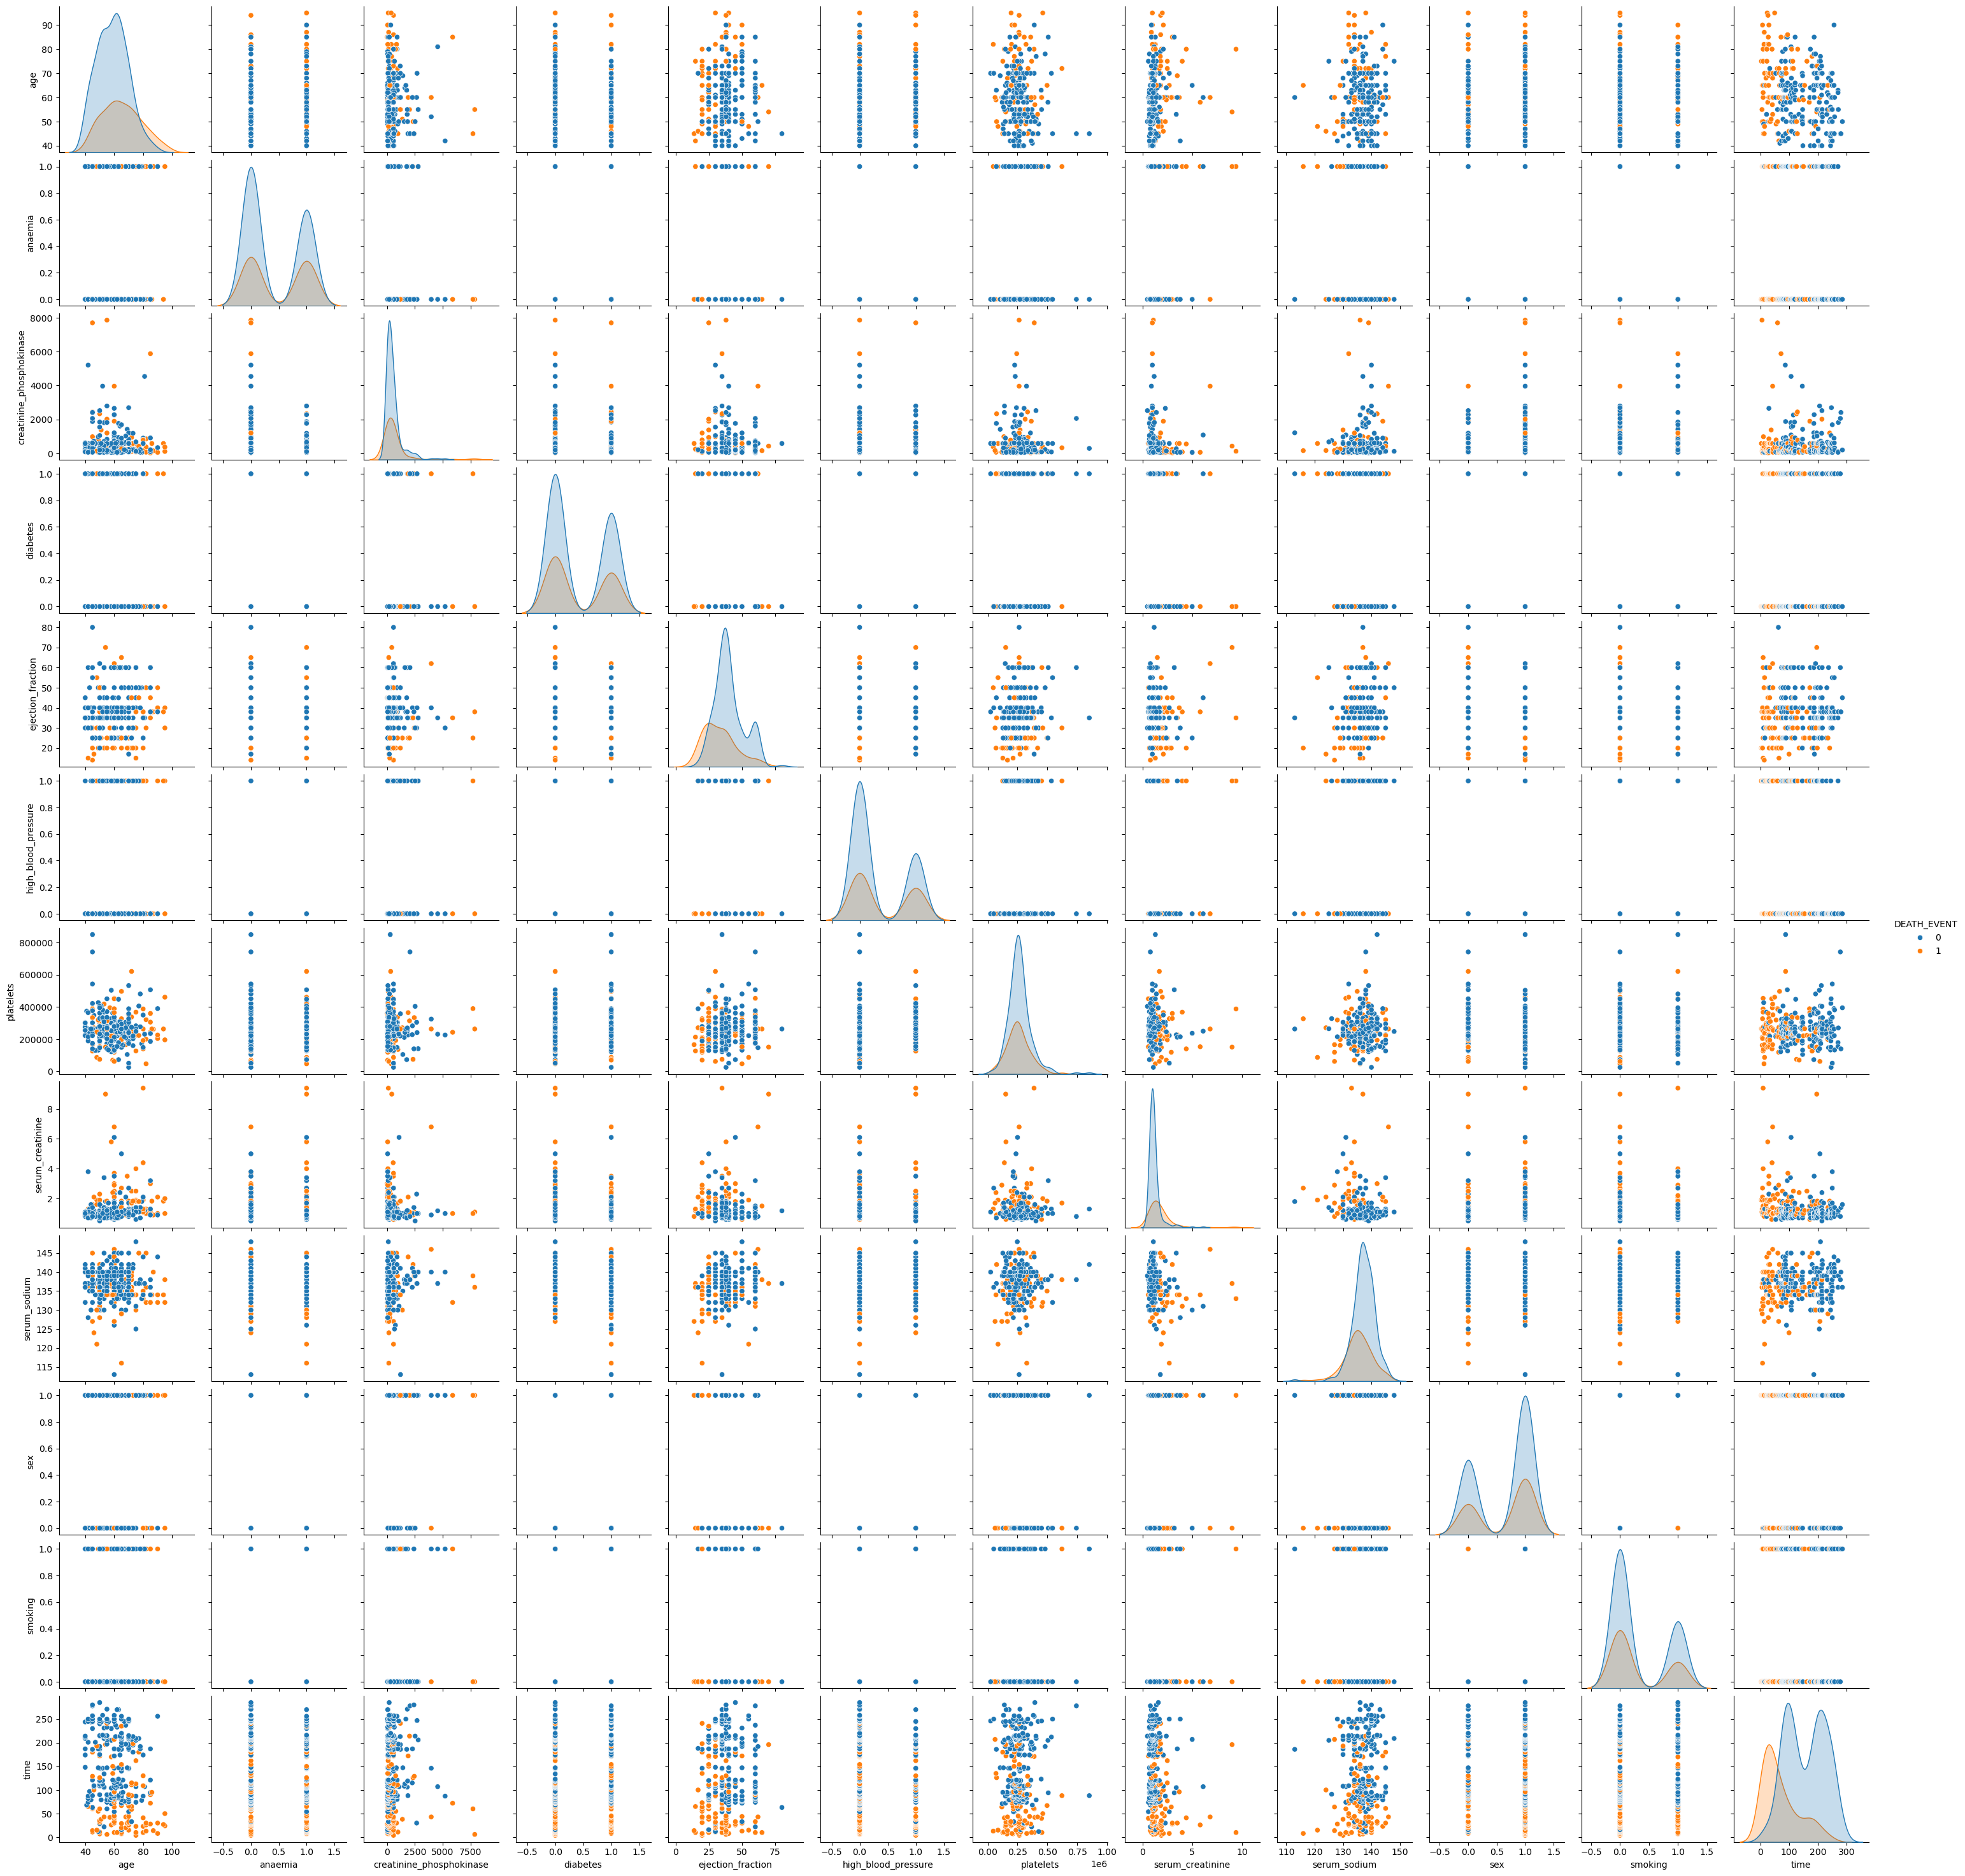

In [11]:
import seaborn as sns

sns.pairplot(df, hue='DEATH_EVENT')

Данные были масштабированы с использованием StandardScaler, который приводит каждый признак к распределению со средним значением 0 и стандартным отклонением 1. Стандартизация данных обязательна для методов, чувствительных к масштабам признаков. Если признаки находятся в разных единицах измерения (например, метры и километры), это может привести к неверным результатам кластеризации

Из библиотеки sklearn были импортированы методы StandardScaler для нормализации данных и train_test_split для разбиения данных на обучающую и тестовую выборки. Нужные столбцы для прогнозирования были выбраны и занесены в переменные X и Y. Нормализация применялась к побочным признакам X. Данные были разделены на X_train, X_valid, y_train и y_valid. Для обучения модели использовались X_train и y_train

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['DEATH_EVENT'])
Y = df['DEATH_EVENT'];

X_train, X_valid, y_train, y_valid = train_test_split(X, Y,  test_size=0.30, random_state=0);

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

Была обучена модель методом k-ближайших соседей. К-ближайших соседей (K-Nearest Neighbors или просто KNN) — алгоритм классификации, основанный на гипотезе компактности, которая предполагает, что расположенные близко друг к другу объекты в пространстве признаков имеют схожие значения целевой переменной или принадлежат к одному классу. Использовался импортированный метод KNeighborsClassifier c параметром n_neighbors=5. Такое значение параметра обусловлено его эффективностью по сравнению с остальными числовыми значениями. При значениях до 5 эффективность модели последовательно увеличивается, а после начинает стремительно падать

In [16]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)
pred_knn = model_knn.predict(X_valid_scaled);

Был импортирован RandomForestClassifier из библиотеки sklearn.ensemble. Создан объект модели случайного леса с фиксированным начальным состоянием генератора случайных чисел (random_state=42) и количеством деревьев в лесу (n_estimators=100). Модель была обучена на тренировочных данных с использованием метода fit



In [18]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=21, n_estimators=100)
model_rf.fit(X_train_scaled, y_train)
pred_rf = model_rf.predict(X_valid_scaled)

Логистическая регрессия — это метод классификации, который используется для предсказания вероятности принадлежности объекта к определенному классу, преобразуя линейную комбинацию признаков через сигмоидальную функцию в значения от 0 до 1. В отличие от деревьев решений, логистическая регрессия представляет собой линейную модель, где целевая переменная является вероятностью, и на основе этого производится прогноз. Этот метод особенно эффективен, когда данные линейно разделимы, и требуется быстрая и интерпретируемая модель. В Python модель логистической регрессии реализована в sklearn.linear_model.LogisticRegression.

In [20]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=22)
model_lr.fit(X_train_scaled, y_train)
pred_lr = model_lr.predict(X_valid_scaled)

Дерево решений — это один из наиболее простых и интерпретируемых алгоритмов машинного обучения, который используется для классификации и регрессии. Алгоритм строит структуру, напоминающую дерево, где каждый узел представляет собой условие на основе одного из признаков, а листья — это предсказанные значения. В случае регрессии алгоритм вычисляет среднее значение для объектов, попавших в соответствующий кластер. При обучении дерево решений делит данные на подгруппы, максимизируя разделение между ними, основываясь на минимизации внутрикластерной дисперсии (для задачи регрессии).

In [22]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=23)
model_dt.fit(X_train_scaled, y_train)
pred_dt = model_dt.predict(X_valid_scaled)

Для каждой модели расчитываются следующие метрики: Accuracy, Precision, Recall, Balanced Accuracy и F1 Score. Accuracy показывает общую долю правильно предсказанных объектов, однако при несбалансированных данных может быть менее информативной, поэтому дополнительно используется Balanced Accuracy, которая усредняет точность для каждого класса. Precision измеряет точность предсказаний положительного класса, определяя, сколько из предсказанных позитивных объектов действительно являются таковыми, тогда как Recall (полнота) показывает, насколько хорошо модель находит все объекты положительного класса. F1 Score гармонически балансирует между Precision и Recall, что особенно полезно, когда важен как минимум ложных срабатываний, так и пропусков. Для вычисления этих метрик предсказания каждой модели сравниваются с истинными значениями на валидационных данных с использованием функций из библиотеки sklearn.metrics. Сравнение результатов позволяет сделать выводы об эффективности каждой модели и выбрать метод, который лучше справляется с поставленной задачей

In [24]:
from sklearn.metrics import ( 
classification_report, # отчёт о классификации
accuracy_score, # доля правильных ответов
precision_score, # точность
recall_score, # полнота
f1_score, # F1-мера
confusion_matrix,
roc_auc_score,
roc_curve,
balanced_accuracy_score)
    
#KNN
pre_knn = precision_score(y_valid, pred_knn) # Precision
rec_knn = recall_score(y_valid, pred_knn) # Recall
f1_knn = f1_score(y_valid, pred_knn) # F1 score
ac_knn = accuracy_score(y_valid, pred_knn) # Accuracy
bac_knn = balanced_accuracy_score(y_valid, pred_knn) # Balanced Accuracy

#RandomForest
classification_report(y_valid, pred_rf)
pre_rf = precision_score(y_valid, pred_rf) 
rec_rf = recall_score(y_valid, pred_rf) 
f1_rf = f1_score(y_valid, pred_rf) 
ac_rf = accuracy_score(y_valid, pred_rf) 
bac_rf = balanced_accuracy_score(y_valid, pred_rf)

#LogisticRegression
classification_report(y_valid, pred_lr)
pre_lr = precision_score(y_valid, pred_lr) 
rec_lr = recall_score(y_valid, pred_lr) 
f1_lr = f1_score(y_valid, pred_lr) 
ac_lr = accuracy_score(y_valid, pred_lr) 
bac_lr = balanced_accuracy_score(y_valid, pred_lr)

#DecisionTree
classification_report(y_valid, pred_dt)
pre_dt = precision_score(y_valid, pred_dt) 
rec_dt = recall_score(y_valid, pred_dt) 
f1_dt = f1_score(y_valid, pred_dt) 
ac_dt = accuracy_score(y_valid, pred_dt) 
bac_dt = balanced_accuracy_score(y_valid, pred_dt)

model_metrics = pd.DataFrame({
    'Model': ['K-Nearest Neighbors', 'RandomForest', 'LogisticRegression', 'DecisionTree'],
    'Precision': [pre_knn, pre_rf, pre_lr, pre_dt],
    'Recall': [rec_knn, rec_rf, rec_lr, rec_dt],
    'F1 score': [f1_knn, f1_rf, f1_lr, f1_dt],
    'Accuracy': [ac_knn, ac_rf, ac_lr, ac_dt,],
    'Balanced Accuracy': [bac_knn, bac_rf, bac_lr, bac_dt]
})

model_metrics

,Model,Precision,Recall,F1 score,Accuracy,Balanced Accuracy
0,K-Nearest Neighbors,0.769231,0.357143,0.487805,0.766667,0.654378
1,RandomForest,0.900000,0.642857,0.750000,0.866667,0.805300
2,LogisticRegression,0.789474,0.535714,0.638298,0.811111,0.735599
3,DecisionTree,0.633333,0.678571,0.655172,0.777778,0.750576


Был создан DataFrame для представления результатов работы различных моделей. В столбец Model были внесены названия обученных моделей, таких как метод k-ближайших соседей, случайный лес, логистическая регрессия и дерево решений. Метрики Accuracy, Precision, Recall, Balanced Accuracy и F1 Score для каждой модели были добавлены в соответствующие столбцы, используя заранее вычисленные значения. Для формирования таблицы использовался метод pd.DataFrame, который преобразовал данные в удобный для анализа табличный формат. Итоговая таблица предназначена для сравнения моделей по их качеству. Результаты сравнения приведены в выводе

Text(0.5, 23.52222222222222, 'Предсказанные значения')

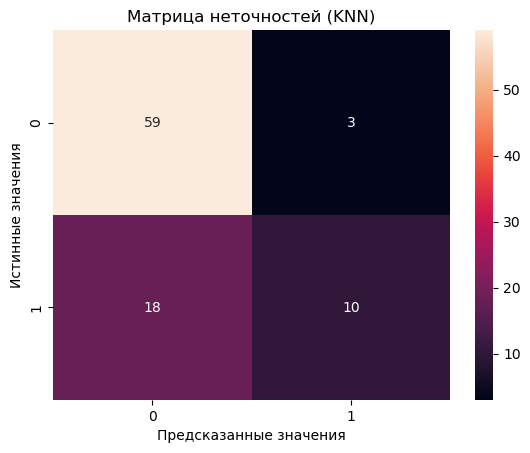

In [26]:
matrix_knn = confusion_matrix(y_valid, pred_knn)
sns.heatmap(matrix_knn, annot=True)
plt.title("Матрица неточностей (KNN)");
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

Text(0.5, 23.52222222222222, 'Предсказанные значения')

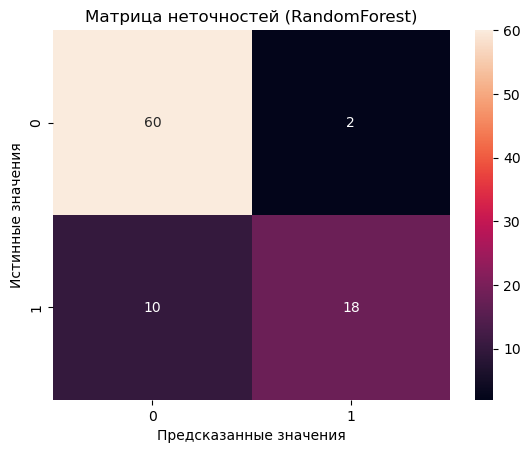

In [27]:
matrix_rf = confusion_matrix(y_valid, pred_rf)
sns.heatmap(matrix_rf, annot=True)
plt.title("Матрица неточностей (RandomForest)");
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

Text(0.5, 23.52222222222222, 'Предсказанные значения')

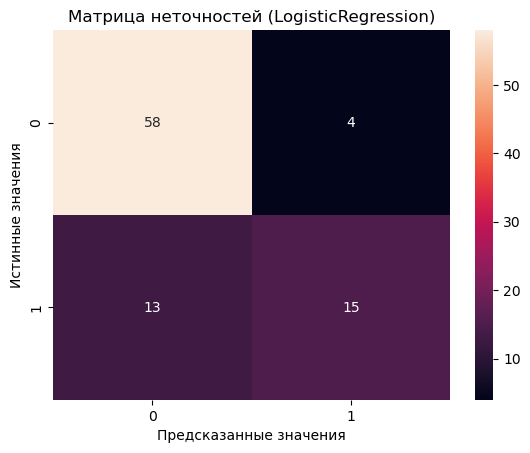

In [28]:
matrix_lr = confusion_matrix(y_valid, pred_lr)
sns.heatmap(matrix_lr, annot=True)
plt.title("Матрица неточностей (LogisticRegression)");
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

Text(0.5, 23.52222222222222, 'Предсказанные значения')

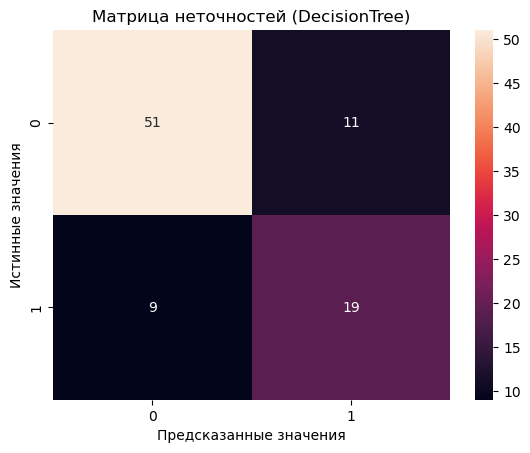

In [29]:
matrix_dt = confusion_matrix(y_valid, pred_dt)
sns.heatmap(matrix_dt, annot=True)
plt.title("Матрица неточностей (DecisionTree)");
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

На матрицах неточностей для K-Nearest Neighbors (KNN), Random Forest, Logistic Regression и Decision Tree показаны различия в классификации моделей. Для KNN модель правильно предсказала 59 объектов класса 0 и 10 объектов класса 1, но 18 объектов класса 1 были неверно классифицированы как 0, что объясняет более низкую метрику Recall. В случае Random Forest модель имеет наилучшие результаты: правильно определены 60 объектов класса 0 и 18 объектов класса 1, при этом только 10 ошибок для класса 1, что демонстрирует высокую Precision и Recall. Для Logistic Regression модель показала чуть худшие результаты, чем Random Forest: правильно классифицированы 58 объектов класса 0 и 15 объектов класса 1, с 13 ошибками для класса 1, что подтверждает её сбалансированную производительность. Наконец, для Decision Tree модель допустила больше ошибок: 51 объект класса 0 и 19 объектов класса 1 классифицированы правильно, но 11 объектов класса 0 и 9 объектов класса 1 неверно предсказаны, что снижает Precision и Recall по сравнению с остальными моделями. Таким образом, Random Forest демонстрирует наилучшие результаты среди представленных методов, обеспечивая минимальные ошибки и оптимальный баланс между Precision и Recall.

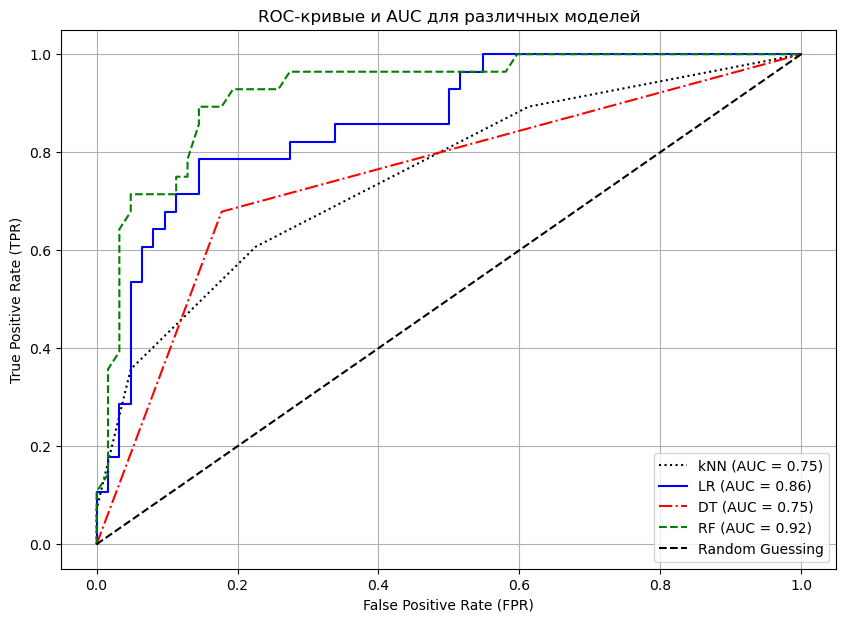

In [31]:
# предсказанные вероятности
probabilities_knn = model_knn.predict_proba(X_valid_scaled)
probabilities_rf = model_rf.predict_proba(X_valid_scaled)
probabilities_lr = model_lr.predict_proba(X_valid_scaled)
probabilities_dt = model_dt.predict_proba(X_valid_scaled)

# FPR, TPR
fpr_knn, tpr_knn, _ = roc_curve(y_valid, probabilities_knn[:, 1])
fpr_lr, tpr_lr, _ = roc_curve(y_valid, probabilities_lr[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_valid, probabilities_dt[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_valid, probabilities_rf[:, 1])

# AUC
roc_auc_knn = roc_auc_score(y_valid, probabilities_knn[:, 1])
roc_auc_lr = roc_auc_score(y_valid, probabilities_lr[:, 1])
roc_auc_dt = roc_auc_score(y_valid, probabilities_dt[:, 1])
roc_auc_rf = roc_auc_score(y_valid, probabilities_rf[:, 1])

# построение графика
plt.figure(figsize=(10, 7))
plt.plot(fpr_knn, tpr_knn, linestyle=':', color='black', label=f'kNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_lr, tpr_lr, linestyle='-', color='blue', label=f'LR (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, linestyle='-.', color='red', label=f'DT (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, linestyle='--', color='green', label=f'RF (AUC = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.title('ROC-кривые и AUC для различных моделей')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

ROC-кривая (Receiver Operating Characteristic) — это инструмент для оценки качества бинарного классификатора на всех возможных порогах принятия решений. Она строится на основе двух основных метрик: True Positive Rate (TPR) и False Positive Rate (FPR). По оси X на графике откладывается FPR, который показывает долю ложно положительных предсказаний, а по оси Y — TPR, демонстрирующий долю истинно положительных предсказаний. TPR (True Positive Rate), также называемый Recall или Sensitivity, показывает, какая часть объектов положительного класса была правильно предсказана. 
Чтобы построить ROC-кривую, необходимо рассчитать TPR и FPR для различных порогов классификации. Для этого была импортирована функция roc_curve, которая принимает на вход вектор истинных меток y_valid и вектор предсказанных вероятностей probabilities


Значения AUC для различных моделей классификации позволяют оценить их способность разделять классы. Чем выше значение AUC (Area Under the Curve), тем лучше модель справляется с задачей. Вот интерпретация представленных значений:

KNN (AUC = 0.75):
K-Nearest Neighbors показывает умеренную способность к классификации. Значение 0.75 указывает, что модель в 75% случаев правильно отличает положительные примеры от отрицательных. Однако из-за ограниченной гибкости KNN модель чувствительна к структуре данных и масштабированию признаков.

Logistic Regression (AUC = 0.86):
Логистическая регрессия демонстрирует высокую эффективность (AUC = 0.86), что говорит о хорошем разделении классов. Модель работает лучше KNN и достаточно уверенно определяет вероятность принадлежности объектов к классу 1.

Decision Tree (AUC = 0.75):
Дерево решений имеет такое же значение AUC (0.75), как и KNN. Это указывает на умеренное качество классификации, но модель может быть менее устойчивой из-за склонности к переобучению.

Random Forest (AUC = 0.92):
Случайный лес показывает наилучший результат среди всех моделей с AUC = 0.92. Это указывает на отличное качество классификации и способность модели эффективно обобщать данные. Random Forest минимизирует переобучение за счет использования ансамбля деревьев и случайности в обучении.



Вывод

1. K-Nearest Neighbors (KNN)
Precision: 0.769 (76.9%) — неплохая точность предсказаний положительного класса.
Recall: 0.357 (35.7%) — очень низкая полнота, модель пропускает значительное количество объектов положительного класса.
F1 score: 0.487 — гармоническое среднее между Precision и Recall показывает низкую сбалансированность.
Accuracy: 76.7% — общая точность модели на всех классах.
Balanced Accuracy: 65.4% — модель имеет неудовлетворительную производительность на несбалансированных данных. Модель KNN показывает неплохую точность (Precision), но низкую полноту (Recall), что говорит о слабой способности находить объекты положительного класса. Общая и сбалансированная точность ниже, чем у других моделей.

2. Random Forest
Precision: 0.900 (90.0%) — высокая точность предсказаний, модель редко ошибается при определении положительного класса.
Recall: 0.643 (64.3%) — хорошая полнота, но есть пропущенные положительные объекты.
F1 score: 0.750 — сбалансированный показатель Precision и Recall демонстрирует стабильную производительность.
Accuracy: 86.7% — наивысшая общая точность среди всех моделей.
Balanced Accuracy: 80.5% — высокая сбалансированная точность на всех классах. Random Forest является лучшей моделью среди представленных. Она демонстрирует высокие показатели точности, сбалансированную полноту и общее качество, что делает её наиболее эффективной для данной задачи.

3. Logistic Regression
Precision: 0.789 (78.9%) — средняя точность, модель достаточно хорошо предсказывает положительный класс.
Recall: 0.536 (53.6%) — средняя полнота, модель пропускает около половины положительных объектов.
F1 score: 0.638 — показывает умеренный баланс между Precision и Recall.
Accuracy: 81.1% — хорошая общая точность.
Balanced Accuracy: 73.5% — сбалансированная точность на среднем уровне. Logistic Regression показывает стабильные результаты, уступая Random Forest по всем метрикам. Модель является неплохой, но менее точной и сбалансированной.

4. Decision Tree
Precision: 0.633 (63.3%) — самая низкая точность среди всех моделей, модель часто ошибается при определении положительного класса.
Recall: 0.679 (67.9%) — хорошая полнота, модель успешно находит положительные объекты.
F1 score: 0.655 — сбалансированный показатель, но ниже, чем у Random Forest.
Accuracy: 77.8% — общая точность выше, чем у KNN, но ниже, чем у Logistic Regression и Random Forest.
Balanced Accuracy: 75.0% — умеренное значение, модель работает лучше на несбалансированных данных, чем KNN. Decision Tree показывает хорошую полноту (Recall), но низкую точность (Precision), что делает её менее надёжной. Производительность находится на среднем уровне.

Сравнение моделей показывает, что Random Forest является наилучшей моделью, так как она демонстрирует наивысшие показатели Precision, F1 score, Accuracy и Balanced Accuracy. Logistic Regression занимает второе место, показывая стабильные, но менее высокие результаты. Decision Tree имеет хорошую полноту, но низкую точность, что снижает её эффективность. Модель K-Nearest Neighbors (KNN) показывает худшую производительность, особенно по Recall, что указывает на её слабую способность находить объекты положительного класса.

Индивидуальное задание (Доп. задание 15)

Алгоритм анализирует зависимость точности классификации (accuracy) от параметра n_estimators (количество деревьев) в модели случайного леса (RandomForestClassifier). Сначала создается диапазон значений n_estimators от 10 до 200 с шагом 20. Затем инициализируются списки для хранения точности на тренировочных и тестовых данных. В цикле по значениям n_estimators модель случайного леса создается, обучается на тренировочных данных, после чего выполняется предсказание для тренировочных и тестовых выборок. Точность вычисляется с использованием метрики accuracy_score и сохраняется в соответствующих списках. Далее строится график, где по оси X откладываются значения n_estimators, а по оси Y — точность. Линии для тренировочных и тестовых данных добавляются на график, с подписями осей, заголовком, легендой и сеткой. Итоговый график показывает, как изменяется точность модели при увеличении количества деревьев, что помогает определить оптимальное значение n_estimators, обеспечивающее баланс между переобучением и недообучением

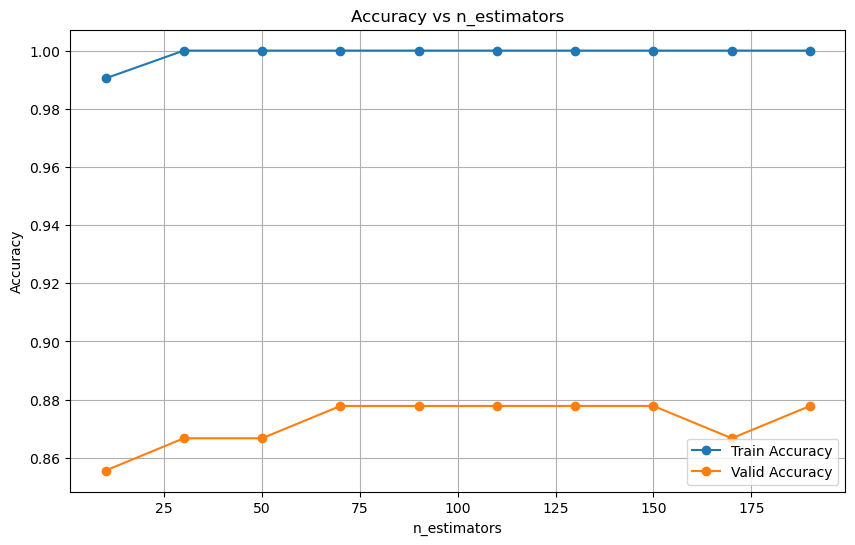

In [38]:
n_estimators = range(10, 210, 20)

train_accuracy_score = []
valid_accuracy_score = []

for i in n_estimators:
    model = RandomForestClassifier(n_estimators=i, random_state=1)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    
    train_accuracy_score.append(train_accuracy)
    valid_accuracy_score.append(valid_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, train_accuracy_score, label="Train Accuracy", marker='o')
plt.plot(n_estimators, valid_accuracy_score, label="Valid Accuracy", marker='o')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs n_estimators")
plt.legend()
plt.grid(True)
plt.show()

График демонстрирует изменение точности модели (accuracy) на тренировочных и тестовых данных в зависимости от параметра n_estimators, который определяет количество деревьев в случайном лесе. Тренировочная точность (синяя линия) остается близкой к 1 (100%) при всех значениях n_estimators, что свидетельствует о переобучении модели: она идеально запоминает тренировочные данные, но это не гарантирует хорошей обобщающей способности на тестовых данных. Тестовая точность (оранжевая линия) заметно ниже, стабилизируется в пределах 86–88% по мере увеличения числа деревьев, начиная с значения n_estimators около 50–75, что может указывать на достижение оптимального значения, после которого точность практически не улучшается. Локальный спад точности тестовых данных при n_estimators=150 может быть связан с флуктуациями данных или особенностями модели. Таким образом, оптимальное значение n_estimators находится в диапазоне от 50 до 100, поскольку дальнейшее увеличение числа деревьев не приносит значимого прироста точности на тестовой выборке. Стоит отметить, что модель переобучена на тренировочных данных, поэтому можно рассмотреть дополнительные методы для борьбы с переобучением, такие как настройка параметров, уменьшение глубины деревьев